# Interactive bands adjustment

The automatic bands generation may not be sufficient to select the optimal line region or to avoid bad pixels in the observations. In this case, you can manually adjust the line selection using $\texttt{spec.check.bands}$:

In [18]:
import lime

# State the files location
bands_folder = '../0_resources/bands/'
obsFitsFile = '../0_resources/spectra/gp121903_osiris.fits'
lineBandsFile = '../0_resources/bands/gp121903_bands.txt'
cfgFile = '../0_resources/long_slit.toml'
osiris_gp_df_path = '../0_resources/bands/osiris_green_peas_linesDF.txt'

# Load configuration|
obs_cfg = lime.load_cfg(cfgFile)
z_obj = obs_cfg['osiris']['gp121903']['z']
norm_flux = obs_cfg['osiris']['norm_flux']

# Declare LiMe spectrum
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)

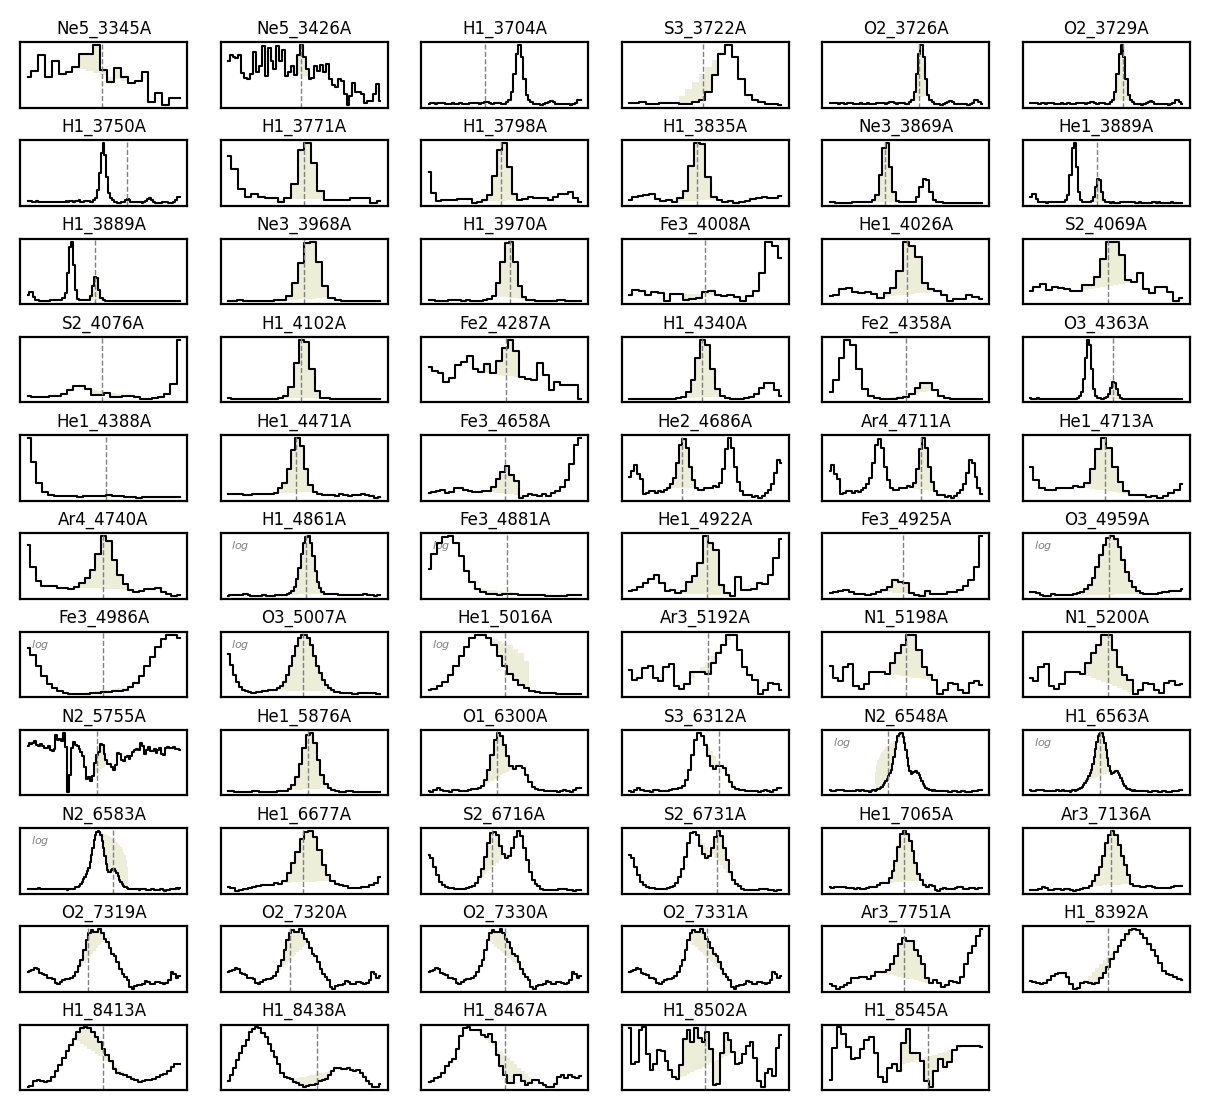

In [19]:
obj_linesDF = gp_spec.check.bands(fname=f'{bands_folder}/objBands_v1.txt', band_vsigma=100, n_sigma=4, instrumental_correction=True,
                                  map_band_vsigma={'H1_4861A': 200, 'H1_6563A': 200, 'N2_6548A': 200, 'N2_6583A': 200, 'O3_4959A': 250, 'O3_5007A': 250},
                                  default_status=True)

If you run this command outside a notebook, you can interact with the individual cells, and the changes will be saved to the ``fname`` file path:

* Right-clicking on a line subplot will include or exclude the line from the output bands file (excluded lines have a red background).
* Middle-clicking on a line plot will change the label group suffix in the output bands file. The options are blended **(_b)**, merged **(_m)**, and single **(no suffix)** lines. This will update the label in the plot title accordingly.
* Left-clicking and dragging allows you to adjust the band limits.


In the code above, the continuum bands are not displayed. However, by setting the argument ``show_continua=True``, you can include them in the manual adjustment as well:

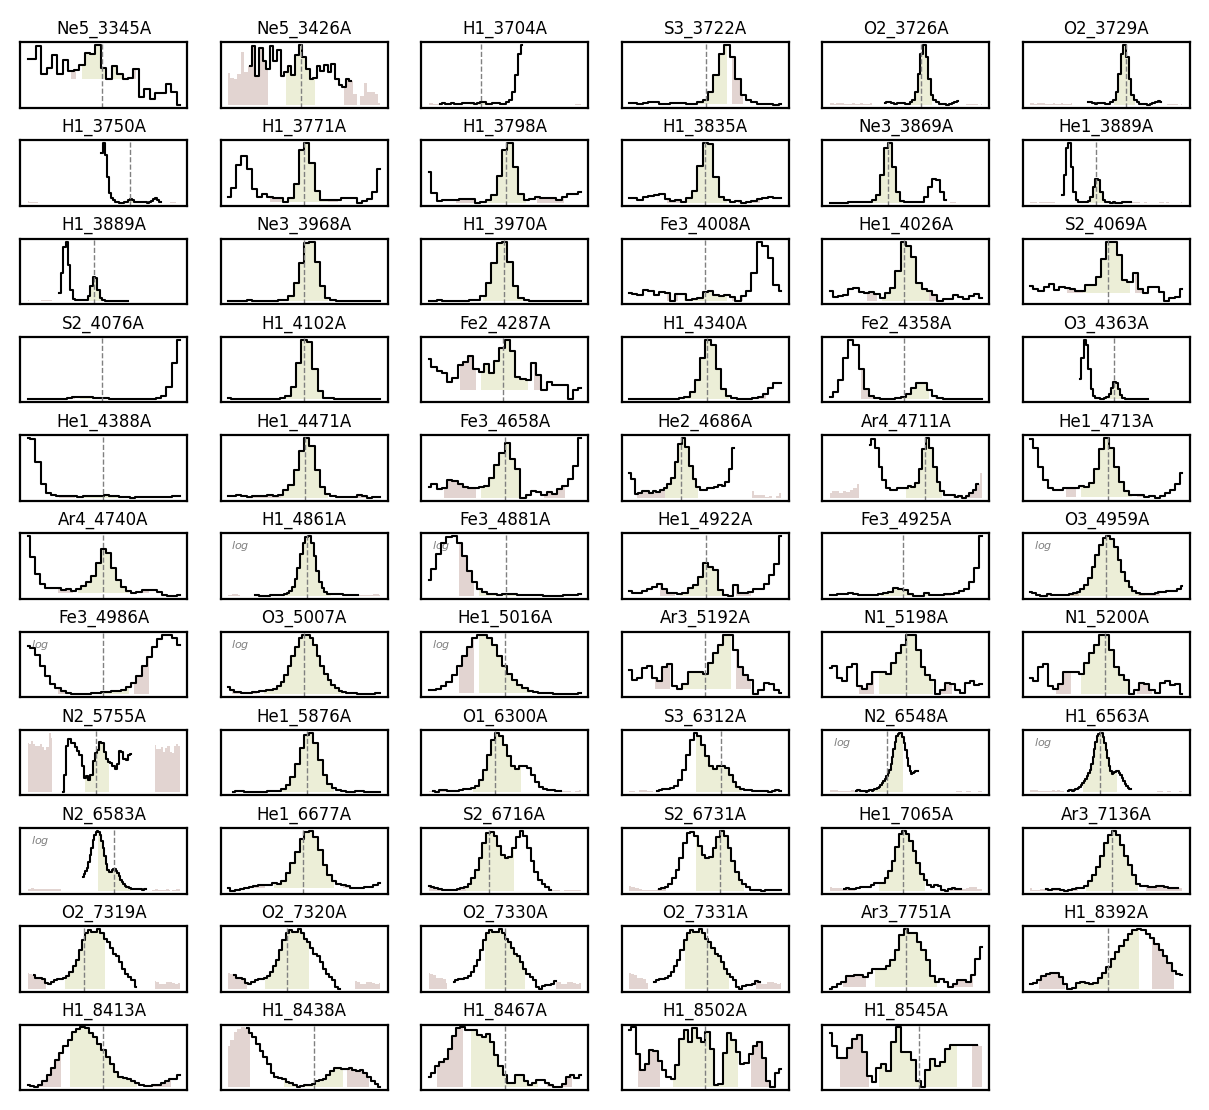

In [17]:
obj_linesDF = gp_spec.check.bands(fname=f'{bands_folder}/objBands_v2.txt', band_vsigma=100, n_sigma=4, instrumental_correction=True,
                                  map_band_vsigma={'H1_4861A': 200, 'H1_6563A': 200, 'N2_6548A': 200, 'N2_6583A': 200, 'O3_4959A': 250, 'O3_5007A': 250},
                                  default_status=True, show_continua=True)

The band modification depends on the initial left-click location:

<img src="../0_resources/images/bands_definition.png" width="1200" />

* To change the line band ($w3$, $w4$), you must click between the current $w2$ and $w5$ wavelengths.
* To change the continuum bands you must start with a left-click in a region within the current left ($w1$, $w2$) or right ($w5$, $w6$)continuum interval, respectively (only if ``show_continua=True``).
* The plot wavelength range is always 5 pixels beyond the band limits. Therefore, dragging the mouse below $w1$ or above $w6$ will adjust the displayed range. This can be used to move beyond the original wavelength limits.



## Initial values:

The [$\texttt{spec.check.bands}$](../4_references/outputs1_measurements.rst) function accepts all the arguments from [$\texttt{spec.retrieve.lines\_frame}$](../4_references/outputs1_measurements.rst). Consequently, you can apply all the techniques from the [automatic line bands tutorial](../2_guides/1_prepare_line_bands.ipynb) to generate the original lines table:

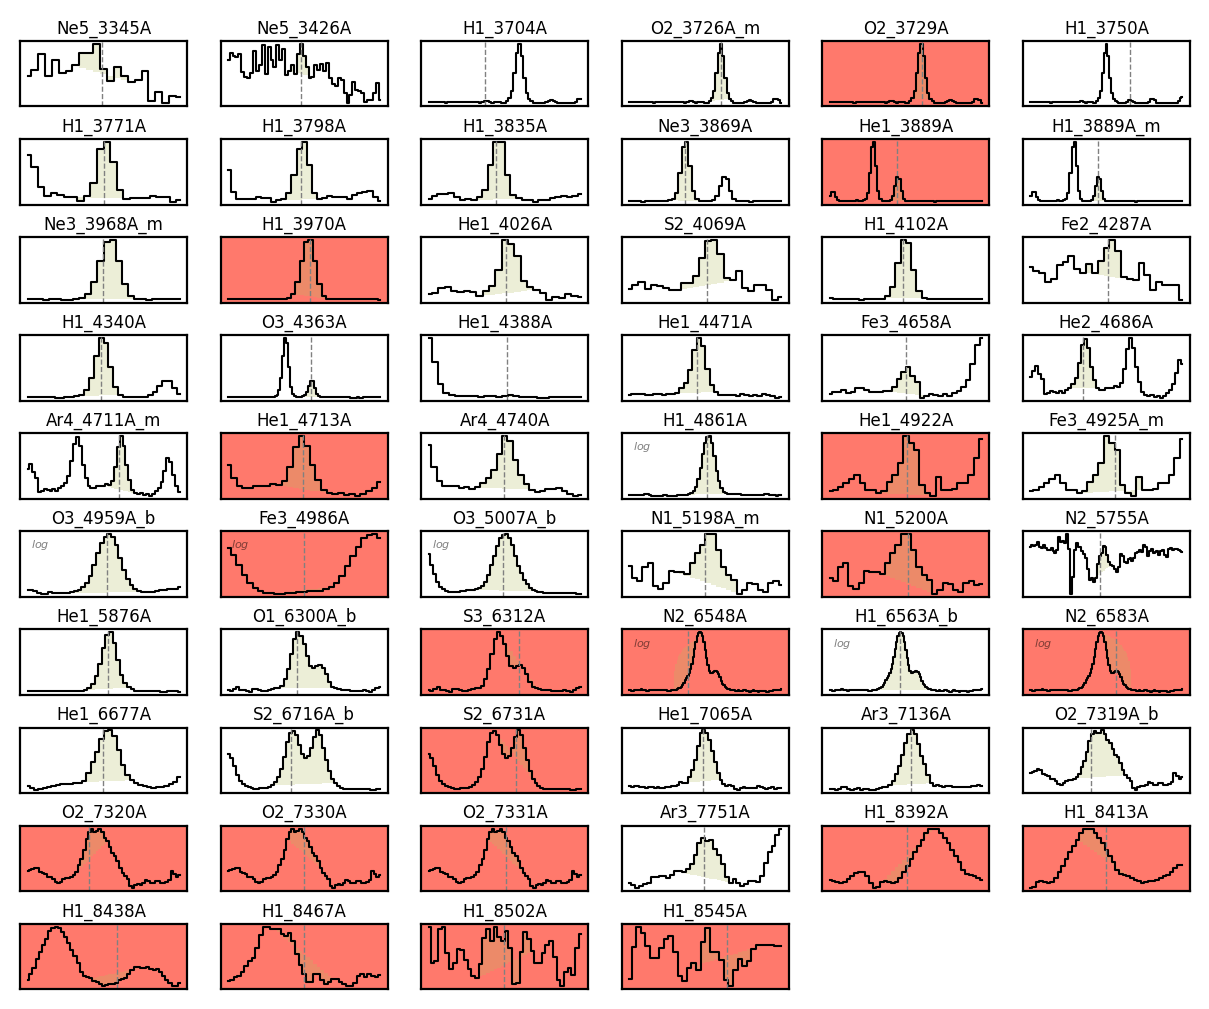

In [20]:
gp_spec.check.bands(fname=f'{bands_folder}/objBands_v3.txt', band_vsigma=100, n_sigma=4, instrumental_correction=True,
                    map_band_vsigma={'H1_4861A': 200, 'H1_6563A': 200, 'N2_6548A': 200, 'N2_6583A': 200,
                                     'O3_4959A': 250, 'O3_5007A': 250},
                    rejected_lines=['Ne5_3426A', 'N2_5755A', 'He1_5016A'],
                    fit_cfg=cfgFile, default_cfg_prefix='default', obj_cfg_prefix='gp121903_osiris',
                    grouped_lines = ['O2_3726A_m', 'O1_6300A_b', 'S2_6716A_b'],
                    automatic_grouping=True,
                    ref_bands=osiris_gp_df_path, maximize=True)

In this case, the blended and merged lines are already defined, and the transitions included in those groups are excluded from the selection, along with those specified in the ``rejected_lines`` argument.

<div class="alert alert-warning">

**Please note:** The output file at the ``fname`` path will only be created if the user makes a manual modification. Moreover, if a file already exists, all ``fit_cfg`` and ``automatic_grouping`` settings will be ignored, giving preference to the values in the file. Once the ``fname`` file exists, only manual interactions will be recorded.

</div>

## Takeaways

* Once you have created your object line bands using the [$\texttt{spec.retrieve.lines\_frame}$](../4_references/outputs1_measurements.rst) you can use [$\texttt{spec.check.bands}$](../4_references/outputs1_measurements.rst) to change the line and continua bands interactively.
* You can use left-click to change the line continua regions, middle-click change group type and right-click to remove/add lines. Moreover setting ``show_continua=True`` you can also change the continua bands.
* The [$\texttt{spec.check.bands}$](../4_references/outputs1_measurements.rst) accepts all the arguments from the [$\texttt{spec.retrieve.lines\_frame}$](../4_references/outputs1_measurements.rst) function. However, once you have created a ``fname`` table, this function arguments won't change the existing values. Only further interative modifications will change the selections. You are adviced to combine this function along side [$\texttt{spec.retrieve.lines\_frame}$](../4_references/outputs1_measurements.rst) and a logic to detect an existing file in the case of complex sample reviews.
You can read the function documentation in the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html).